In [1]:
import pandas as pd
data = pd.read_csv('Consumer_Complaints.csv')
data.groupby('Product').count()
columns = ['Virtual currency','Other financial service']
smallGroupDf = data[data['Product'].isin(columns)]
smallGroupDf.shape
sampleDf = data[~data['Product'].isin(columns)]
sampleDf = sampleDf.sample(frac=0.02)
df = pd.concat([smallGroupDf,sampleDf])
df.shape
del data, sampleDf, smallGroupDf 
df.head()

c:\users\mglewis\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
489377,04/21/2017,Other financial service,Credit repair,Disclosures,NaN,NaN,NaN,"TIAA, FSB",FL,32218,Older American,NaN,Phone,04/21/2017,Closed with explanation,Yes,No,2447338
489513,04/21/2017,Other financial service,Debt settlement,Fraud or scam,NaN,NaN,Company believes it acted appropriately as aut...,Equitable Acceptance Corporation,FL,32258,Servicemember,NaN,Phone,05/03/2017,Closed with explanation,Yes,No,2446925
489637,04/21/2017,Other financial service,Check cashing,Customer service/Customer relations,NaN,NaN,Company has responded to the consumer and the ...,"Fidelity National Information Services, Inc. (...",NH,038XX,NaN,NaN,Phone,04/21/2017,Closed with explanation,Yes,No,2445906
489773,04/20/2017,Other financial service,Debt settlement,Fraud or scam,NaN,NaN,Company believes it acted appropriately as aut...,Equitable Acceptance Corporation,PA,191XX,NaN,Consent not provided,Web,04/20/2017,Closed with explanation,Yes,No,2445210
489812,04/20/2017,Other financial service,Debt settlement,Fraud or scam,NaN,I attempted to contact Navient to discuss my s...,NaN,"Navient Solutions, LLC.",IN,473XX,NaN,Consent provided,Web,04/21/2017,Closed with explanation,Yes,No,2443955


In [2]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7830 entries, 489812 to 835259
Data columns (total 18 columns):
Date received                   7830 non-null object
Product                         7830 non-null object
Sub-product                     6812 non-null object
Issue                           7830 non-null object
Sub-issue                       5337 non-null object
Consumer complaint narrative    7830 non-null object
Company public response         3697 non-null object
Company                         7830 non-null object
State                           7799 non-null object
ZIP code                        5998 non-null object
Tags                            1364 non-null object
Consumer consent provided?      7830 non-null object
Submitted via                   7830 non-null object
Date sent to company            7830 non-null object
Company response to consumer    7830 non-null object
Timely response?                7830 non-null object
Consumer disputed?              3490 n

In [4]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]

In [5]:

df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [6]:

df.columns = ['Product', 'Consumer_complaint_narrative']

In [7]:
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [8]:
df.head()

,Product,Consumer_complaint_narrative,category_id
489812,Other financial service,I attempted to contact Navient to discuss my s...,0
491814,Other financial service,I was charged XXXX by The Student Loan Help ...,0
492528,Other financial service,I received a call from XXXX XXXX of Premie...,0
492632,Other financial service,Several checks were issued from XXXX for possi...,0
493590,Other financial service,I enrolled in National Budget Planners of Sout...,0


In [9]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

<Figure size 800x600 with 1 Axes>

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(7830, 21848)

In [11]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
       . overdraft
       . bank
  . Most correlated bigrams:
       . deposit box
       . checking account
# 'Checking or savings account':
  . Most correlated unigrams:
       . branch
       . deposit
  . Most correlated bigrams:
       . checking account
       . direct deposit
# 'Consumer Loan':
  . Most correlated unigrams:
       . car
       . vehicle
  . Most correlated bigrams:
       . car xxxx
       . fargo dealer
# 'Credit card':
  . Most correlated unigrams:
       . macy
       . card
  . Most correlated bigrams:
       . american express
       . credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . citi
       . card
  . Most correlated bigrams:
       . balance transfer
       . credit card
# 'Credit reporting':
  . Most correlated unigrams:
       . equifax
       . experian
  . Most correlated bigrams:
       . report equifax
       . credit report
# 'Credit reporting, credit 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [13]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [14]:

print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [15]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id


In [16]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

c:\users\mglewis\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


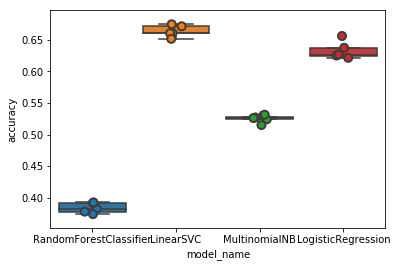

In [18]:

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [19]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.663479
LogisticRegression        0.633097
MultinomialNB             0.524776
RandomForestClassifier    0.383906
Name: accuracy, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

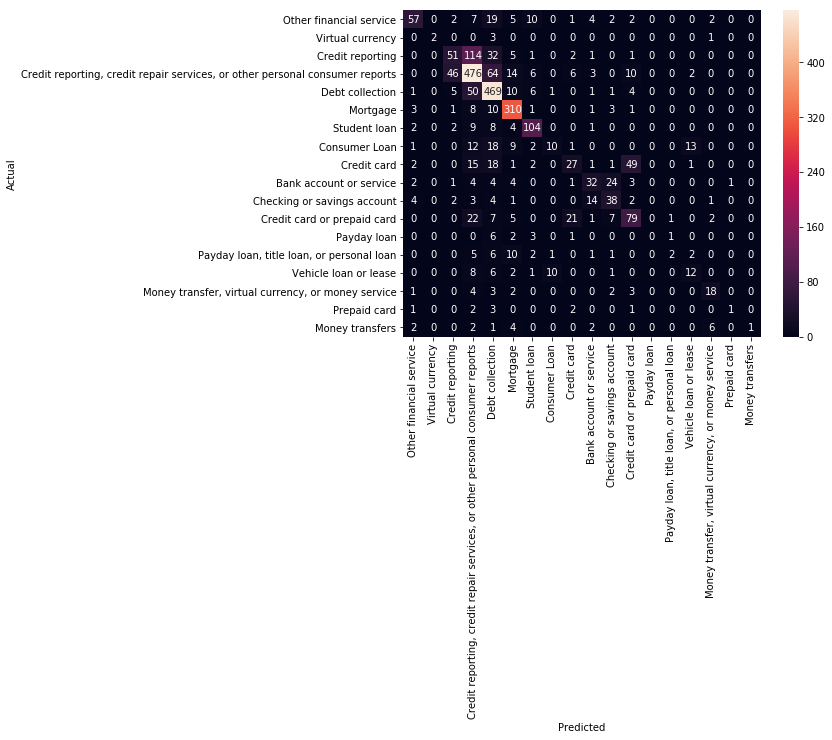

In [21]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [22]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 46 examples.


,Product,Consumer_complaint_narrative
444689,"Credit reporting, credit repair services, or o...",There is a withdrawn Federal tax lien still sh...
244800,"Credit reporting, credit repair services, or o...",the inquiries are unauthorized and that I want...
471730,"Credit reporting, credit repair services, or o...","I have a series of erroneous, credit-damaging ..."
233611,"Credit reporting, credit repair services, or o...",A fraud account was paid off that went into co...
282386,"Credit reporting, credit repair services, or o...",I have a job and the only way Experian will al...
461318,"Credit reporting, credit repair services, or o...",account PAID IN FULL. disputed A MILLION TIMES...
450299,"Credit reporting, credit repair services, or o...",I am having some a long term issue with Equifa...
369269,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX is trying to collect a debt fro...
460757,"Credit reporting, credit repair services, or o...",For years XXXX XXXX XXXX reported only...
368120,"Credit reporting, credit repair services, or o...",A XXXX XXXX XXXX credit card account appears o...



'Other financial service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 7 examples.


,Product,Consumer_complaint_narrative
615282,Other financial service,"The cashier named XXXX XXXX, working in the Ch..."
662368,Other financial service,I utilize Credit Karma to help me manage my cr...
771236,Other financial service,"Received faux notice stating "" your XXXX XXXX ..."
637409,Other financial service,on XXXX XX/XX/2016 i pay {$4.00} to Equifax to...
500055,Other financial service,I opt in to receive assistance from XXXX XX...
729700,Other financial service,My issue is with Morgan Stanley and an Inherit...
520953,Other financial service,Experian sent a letter stating someone had tri...



'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 114 examples.


,Product,Consumer_complaint_narrative
837491,Credit reporting,Some credit agencies have my address as a XXXX...
847395,Credit reporting,I filed a dispute with Experian to get several...
603257,Credit reporting,"On XXXX, 2016 I received notification from XXX..."
718143,Credit reporting,To All party involve Equifax XXXX. XXXX XXXX X...
649990,Credit reporting,I have been disputing information on my credit...
838131,Credit reporting,I was late with paying my electric bill XX/XX/...
720907,Credit reporting,Please refer to case number XXXX for the backg...
707399,Credit reporting,Experian is reporting XXXX accounts as having ...
692318,Credit reporting,I get an account with XXXX XXXX who still show...
828396,Credit reporting,Transunion shows my closed account with XXXX X...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 50 examples.


,Product,Consumer_complaint_narrative
253472,Debt collection,"Hi, Im writing to you regarding an account tha..."
757957,Debt collection,DESIGNED RECEIVABLE XXXX is reporting on my cr...
130015,Debt collection,XXXX XXXX XXXX placed negative item on my cred...
742508,Debt collection,I am not familiar with this company and do not...
303265,Debt collection,"On XXXX XXXX, 2017 XXXX XXXX added a collectio..."
211093,Debt collection,Attn : yopuI have a XXXX XXXX bill that I have...
456379,Debt collection,I am experiencing issues associated with ID th...
389811,Debt collection,XX/XX/XXXX and XX/XX/XXXX {$330.00} and {$140....
600186,Debt collection,"IMC Credit Services in XXXX, IN has reported o..."
147615,Debt collection,Attempt to contact collector several time with...



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 8 examples.


,Product,Consumer_complaint_narrative
736791,Mortgage,I am writing to file a complaint against Natio...
58920,Mortgage,I called on XX/XX/XXXX as I had a question on ...
296589,Mortgage,Cit Bank Mortgage # XXXX The above loan was mo...
523722,Mortgage,I was attempting to assume a mortgage loan fro...
818685,Mortgage,I filed a complaint against Ocwen XXXX weeks a...
679676,Mortgage,This company is trying to say they have a loan...
850121,Mortgage,Rescission Notice was sent. \nI was completely...
656695,Mortgage,Experian 's credit report still has not update...



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 9 examples.


,Product,Consumer_complaint_narrative
70286,Student loan,I received an alert from XXXX XXXX onXXXX-18 s...
310525,Student loan,Subsidized : XXXX Loan start date : XXXX Loan ...
456818,Student loan,I got incorrect interest rate.
43609,Student loan,I have applied for XXXX 's XXXX XXXX XXXX XX...
254718,Student loan,I WAS NEVER UNDER TH IMPRESSION THAT I WERE US...
67182,Student loan,Neltnet Student loans are dismissed because Im...
183461,Student loan,Today on XX/XX/2018 Ive received a text saying...
55807,Student loan,"On XX/XX/XXXX, I signed up for the Income-Driv..."
672410,Student loan,discoverstudentloans.com alleged that I had a ...



'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 12 examples.


,Product,Consumer_complaint_narrative
540645,Consumer Loan,I had cosigned on an auto loan for my son in X...
876092,Consumer Loan,I was told I was preapproved for a Car loan/re...
575722,Consumer Loan,American Credit Acceptance is erroneously repo...
734980,Consumer Loan,We leased XXXX from the local dealer for 2 yea...
782953,Consumer Loan,I have never missed a payment of any kind in m...
636278,Consumer Loan,I am a victim of identity theft. Several years...
825901,Consumer Loan,On XX/XX/XXXX I opened a car loan with Santand...
592857,Consumer Loan,I did not authorize credit inquiry from this c...
764864,Consumer Loan,"According to XXXX XXXX and LendUp.com, I am el..."
676068,Consumer Loan,Account # XXXX XXXX Bank Delaware was paid. Di...



'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 15 examples.


,Product,Consumer_complaint_narrative
614946,Credit card,I had an account that was closed over 7 years ...
863702,Credit card,Acct closed under CHPXXXX Bankruptcy and still...
702500,Credit card,T.D. Bank N.A. failed to provide me with a sta...
620117,Credit card,I received an unsolicited XXXX branded credit ...
583489,Credit card,"XXXX, According to the Fair Credit Reporting A..."
513780,Credit card,I was notified on XX/XX/2017 by CitiCards that...
885583,Credit card,Reporting a account they can not verify. I fou...
790771,Credit card,I have been fighting a fraudulent charge with ...
715726,Credit card,I am a victim of identity theft. We have been ...
827168,Credit card,XX/XX/2015 I received a letter ( dated XX/XX/2...



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 22 examples.


,Product,Consumer_complaint_narrative
424975,Credit card or prepaid card,This involves a fraudulently opened Best Buy C...
297412,Credit card or prepaid card,I requested a copy of a fraudulent application...
245364,Credit card or prepaid card,DEBIT FOR CHECKCARD XXXX XX/XX/XXXXXXXX XXXX X...
136949,Credit card or prepaid card,I received a credit card to help build my cred...
78789,Credit card or prepaid card,"Hi I am sorry, I didn't open the credit card a..."
466148,Credit card or prepaid card,I received a letter from Chase stating that ...
196915,Credit card or prepaid card,The closing statement of XX/XX/XXXX there was ...
183715,Credit card or prepaid card,I signed up for a 0 % APR for 12 months offer ...
406487,Credit card or prepaid card,A purchase was made to XXXX in XX/XX/XXXX for ...
437047,Credit card or prepaid card,Mailed.on XX/XX/XXXX of current year to kohl...



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 8 examples.


,Product,Consumer_complaint_narrative
86471,Vehicle loan or lease,My payments keep showing as late payments. Whe...
292116,Vehicle loan or lease,I have an auto loan with XXXX XXXX XXXX. It wa...
328191,Vehicle loan or lease,I have a XXXX XXXX XXXX financed with XXXX XXX...
290316,Vehicle loan or lease,I was sold a vehicle that stop running and req...
411782,Vehicle loan or lease,My vehicle was illegally repossessed beyond my...
397917,Vehicle loan or lease,They put repo on my credit report and I have m...
41233,Vehicle loan or lease,In XXXX my husband and I contacted XXXX XXXX ...
431056,Vehicle loan or lease,After further investigation into my problem th...



'Other financial service' predicted as 'Debt collection' : 19 examples.


,Product,Consumer_complaint_narrative
629156,Other financial service,I received a letter in the mail from Sofi or S...
862425,Other financial service,I entered into a contract with Trinity Credit ...
737646,Other financial service,I have just started with Clear One Advantage a...
644980,Other financial service,I purchased a WU Money Order for {$75.00} to m...
519464,Other financial service,I was contacted by a representative and was to...
649443,Other financial service,As of XXXX XXXX I had repaid my debt with an e...
788806,Other financial service,Nicholes Financial Inc is reporting a Charged ...
699765,Other financial service,I attempted to exchange euros to dollars at th...
854524,Other financial service,I am submitting a complaint in regards to a ba...
500961,Other financial service,This is not going to end well for anyone on th...



'Credit reporting' predicted as 'Debt collection' : 32 examples.


,Product,Consumer_complaint_narrative
698502,Credit reporting,There are XXXX address that I never had lived ...
868365,Credit reporting,"XXXX XXXX, 2015, I sent Equifax a certified le..."
852941,Credit reporting,My social security was used to set up accounts...
837607,Credit reporting,I had a beauty procedure done in 2011 and paid...
588433,Credit reporting,delete all XXXX XXXX collections from all XXXX...
826348,Credit reporting,I used to be a subscriber with XXXX in the pas...
514961,Credit reporting,I have tried to dispute this online being that...
872666,Credit reporting,"I disputed information, no valid debt confirma..."
502553,Credit reporting,I have disputed XXXX several times. I provided...
834174,Credit reporting,"Hello, my name is XXXX XXXX. \nOn my Credit Re..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 64 examples.


,Product,Consumer_complaint_narrative
117115,"Credit reporting, credit repair services, or o...",XX/XX/2018 Step 1 : What is this complaint abo...
298220,"Credit reporting, credit repair services, or o...",On my XXXX credit it shows I work at XXXX whi...
253634,"Credit reporting, credit repair services, or o...",I was looking at XXXX XXXX and I noticed this ...
182014,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX I was contacted by my employer a...
243320,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX XXXX XXXX will not address...
474026,"Credit reporting, credit repair services, or o...",I should have been advised that because an add...
112984,"Credit reporting, credit repair services, or o...",Complaint XXXX about XXXXXXXX XXXX Care credi...
122800,"Credit reporting, credit repair services, or o...",609a1a of the fair credit reporting act XXXX o...
210982,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX credit card opened balance {$29...
467569,"Credit reporting, credit repair services, or o...",I have a collection that is reporting inaccura...



'Mortgage' predicted as 'Debt collection' : 10 examples.


,Product,Consumer_complaint_narrative
626447,Mortgage,I filed a lawsuit against Nationstar Mortgage ...
211870,Mortgage,I filed a prior complaint with this mortgage c...
665993,Mortgage,I filed for bankruptcy many years ago. I keep ...
195141,Mortgage,Failure to provide Credit Reporting Agencies t...
119666,Mortgage,Our mortgage management company ( Rushmore Loa...
534395,Mortgage,My wife and I were rejected for a Home Equity ...
644572,Mortgage,I tried to make a payment on-line and got an e...
624702,Mortgage,WE FELL BEHIND 2 PMTS. WE SENT IN 1 XXXX PMTS ...
590209,Mortgage,I have been contacted on numerous occasions by...
776363,Mortgage,My house foreclosed and I had a second mortgag...



'Student loan' predicted as 'Debt collection' : 8 examples.


,Product,Consumer_complaint_narrative
139854,Student loan,I get repeated phone calls from different numb...
569440,Student loan,Entered agreement with Performant Recovery Inc...
660297,Student loan,There is a company which was able to collect a...
783917,Student loan,"Navient Has constantly been calling family, fr..."
698816,Student loan,in 2000 I was approached by student loan offic...
722488,Student loan,A party calling themselves XXXX contacted a 3r...
88246,Student loan,on XX/XX/2017 national recovery started the pr...
581545,Student loan,These people continue to harass me and threate...



'Consumer Loan' predicted as 'Debt collection' : 18 examples.


,Product,Consumer_complaint_narrative
608002,Consumer Loan,I leased a car through Chase. At the end of th...
681131,Consumer Loan,I Have had several things added on my credit d...
805339,Consumer Loan,I purchased 'FurnitureGard Comprehensive Plan ...
878008,Consumer Loan,I co-signed a loan for my son-in-law XXXX XXXX...
694329,Consumer Loan,the almost the entire payment goes to interest...
527950,Consumer Loan,"For some unknown reason, Toyota Financial serv..."
638062,Consumer Loan,I AM SUBMITTING THIS COMPLAINT TODAY AGAINST T...
623350,Consumer Loan,I have an open loan with Lendmark financial in...
502886,Consumer Loan,I have been financing a vehicle through Consum...
693311,Consumer Loan,Hi. I received a phone call from my finance co...



'Credit card' predicted as 'Debt collection' : 18 examples.


,Product,Consumer_complaint_narrative
602454,Credit card,I lost my job while in college and Old Navy cl...
710348,Credit card,I made my payment to my Citibank MC on the due...
815146,Credit card,Please reference the initial complaint - Case ...
707773,Credit card,American Express is stalking me on social medi...
878479,Credit card,My credit card company ( Citi ) contacted a pe...
581416,Credit card,"Portfolio Recovery Associates , LLC ( PRA, LLC..."
800917,Credit card,I opened a PayPal credit account 2 years ago b...
588800,Credit card,Not enough information of validation of debt. ...
649866,Credit card,I tried to close the account and was left on h...
627957,Credit card,I am confused. I had to pay my XXXX payment tw...



'Credit card or prepaid card' predicted as 'Debt collection' : 7 examples.


,Product,Consumer_complaint_narrative
225364,Credit card or prepaid card,XX/XX/XXXX : {$1600.00} interest fee was added...
187838,Credit card or prepaid card,"Attached, please find a formatted complaint in..."
39659,Credit card or prepaid card,Access to account by third parties without use...
88103,Credit card or prepaid card,I contacted XXXX XXXX about XXXX XXXX XXXX cha...
252141,Credit card or prepaid card,Received a letter from CITI on XX/XX/2018 stat...
43419,Credit card or prepaid card,I settled a closed capital one credit card acc...
281242,Credit card or prepaid card,On XX/XX/XXXX I purchased a license for XXXX X...



'Payday loan' predicted as 'Debt collection' : 6 examples.


,Product,Consumer_complaint_narrative
596408,Payday loan,XXXX XXXX contacted and would not identify who...
584209,Payday loan,I have a derogatory report for Midwest Recover...
593158,Payday loan,I did not receive a payday loan from anyone! I...
835780,Payday loan,A company called Concord Resolution ( XXXX ) k...
878863,Payday loan,payday loan company offered a loan called real...
596860,Payday loan,"As we previously advised you, you have failed ..."



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 6 examples.


,Product,Consumer_complaint_narrative
264521,"Payday loan, title loan, or personal loan",I've reached out to the company multiple times...
452788,"Payday loan, title loan, or personal loan","On XXXX XXXX, XXXX, my husband and I went to C..."
31566,"Payday loan, title loan, or personal loan",Said I applied and received a pay day loan eve...
420571,"Payday loan, title loan, or personal loan",XX/XX/XXXX- I called wilshire consumer credit ...
136596,"Payday loan, title loan, or personal loan",Garnishment Notification and Arrest Notice LEG...
363322,"Payday loan, title loan, or personal loan",THE COMPANY THAT XXXX XXXX XXXX XXXX IS USING ...



'Vehicle loan or lease' predicted as 'Debt collection' : 6 examples.


,Product,Consumer_complaint_narrative
325347,Vehicle loan or lease,"On XX/XX/XXXX, my younger brother XXXX XXXX XX..."
183891,Vehicle loan or lease,Keep receiving letters from company for paymen...
470895,Vehicle loan or lease,In XXXX I turned my car over for voluntary...
325897,Vehicle loan or lease,Vehicle was deemed a total loss. Insurance hav...
129398,Vehicle loan or lease,This XXXX keeps calling about 5-6 times a day ...
390972,Vehicle loan or lease,can not come to a correct final figure see att...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 14 examples.


,Product,Consumer_complaint_narrative
269817,"Credit reporting, credit repair services, or o...",Midland Mortgage Company and I had a loan agre...
228257,"Credit reporting, credit repair services, or o...",Last year I went looking at open houses and ha...
420313,"Credit reporting, credit repair services, or o...",I have filed several complaints already regard...
127076,"Credit reporting, credit repair services, or o...",I was unemployed from XX/XX/XXXX to XX/XX/2018...
345760,"Credit reporting, credit repair services, or o...",I apply to refinance my home laon with this mo...
283504,"Credit reporting, credit repair services, or o...","To whom it may concern, today is XX/XX/XXXX. Y..."
400441,"Credit reporting, credit repair services, or o...","I would like to start this letter off by, firs..."
101339,"Credit reporting, credit repair services, or o...","As a preface to my complaint, I must clarify t..."
202341,"Credit reporting, credit repair services, or o...","tried multiple times, credit repair companies...."
217577,"Credit reporting, credit repair services, or o...","Found out that my mortgage company, Specialize..."



'Debt collection' predicted as 'Mortgage' : 10 examples.


,Product,Consumer_complaint_narrative
90076,Debt collection,I contacted Citi bank originally in XX/XX/2018...
543414,Debt collection,My lease was ending on XXXX2015.. My boyfriend...
97054,Debt collection,I would like the CFPB to make me a spot check ...
717308,Debt collection,"My ex husband and I owned a house in XXXX, NY...."
838768,Debt collection,I have a loan with XXXX XXXX at XXXX XXXX XXXX...
567222,Debt collection,I have been dealing with an identity theft pro...
797255,Debt collection,VIOLATED FCRA
309346,Debt collection,"XXXX XXXX, XXXX Consumer Financial Protection ..."
125766,Debt collection,1. Loan service company has failed to adjust t...
226352,Debt collection,On XX/XX/XXXX i received a letter from my seco...



'Consumer Loan' predicted as 'Mortgage' : 9 examples.


,Product,Consumer_complaint_narrative
768122,Consumer Loan,I called Southeast Toyota Finance to arrange f...
622575,Consumer Loan,"I am a XXXX Veteran and XX/XX/XXXX, had to aba..."
647775,Consumer Loan,I first filed a complaint on or about XXXX/XXX...
648926,Consumer Loan,I took out a loan with PNC Bank in the amount ...
825529,Consumer Loan,I started a new loan with Wilshire consumer cr...
746077,Consumer Loan,Line of credit loan. Will not or can not send ...
815623,Consumer Loan,I had an auto loan pay off with Wells Fargo an...
655987,Consumer Loan,I took out an unsecured loan in XXXX at One Ma...
802179,Consumer Loan,"Since the start of my loan, which was opened i..."



'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 10 examples.


,Product,Consumer_complaint_narrative
113560,"Payday loan, title loan, or personal loan",on XX/XX/2014 you went online applied for loan...
58558,"Payday loan, title loan, or personal loan","I made a payment on-line on XX/XX/XXXX, which ..."
234497,"Payday loan, title loan, or personal loan",XX/XX/XXXX was the last loan I had paid off fo...
251493,"Payday loan, title loan, or personal loan",I was unable to view the truth in lending disc...
415716,"Payday loan, title loan, or personal loan",I took a {$800.00} loan out on XXXX XXXX. I wa...
284366,"Payday loan, title loan, or personal loan",I received a SBA sponsored loan from Regions B...
421920,"Payday loan, title loan, or personal loan",Please see attached Companies that took part i...
234505,"Payday loan, title loan, or personal loan",charged a pre-payment fee on a lien that was p...
38917,"Payday loan, title loan, or personal loan",The company submitted a tax form at the end of...
460238,"Payday loan, title loan, or personal loan",I apply for a loan online and for the amount o...



'Other financial service' predicted as 'Student loan' : 10 examples.


,Product,Consumer_complaint_narrative
530282,Other financial service,A third party debt relief service -Student Loa...
671658,Other financial service,I am a recent graduate of a XXXX looking for g...
544900,Other financial service,I entered into an Agreement with Student Loan ...
528818,Other financial service,"I was told, i could have my loans cut by 50 %...."
527727,Other financial service,I used a company called FedLoanhelp.org to red...
543716,Other financial service,"A "" student loan debt relief '' company called..."
545420,Other financial service,About a month ago ( XX/XX/XXXX ) I was contact...
777750,Other financial service,After speaking with the handler of my student ...
491814,Other financial service,I was charged XXXX by The Student Loan Help ...
554631,Other financial service,I saw an ad on Facebook that a friend posted s...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Student loan' : 6 examples.


,Product,Consumer_complaint_narrative
434458,"Credit reporting, credit repair services, or o...",I 've been on the Income Driven Repayment Plan...
301086,"Credit reporting, credit repair services, or o...",I received a letter from Navient dated XX/XX/X...
146007,"Credit reporting, credit repair services, or o...",XXXX : Multiple account with wrong information...
67155,"Credit reporting, credit repair services, or o...",Navient claims there is a debt owed on the acc...
273669,"Credit reporting, credit repair services, or o...",My student loans are reporting as late but wer...
58630,"Credit reporting, credit repair services, or o...",After reading the article about XXXX lawsuit t...



'Debt collection' predicted as 'Student loan' : 6 examples.


,Product,Consumer_complaint_narrative
107951,Debt collection,I have student loans through Navient from when...
618751,Debt collection,I register for school in XXXX. At that time th...
483088,Debt collection,"Hello, I have a defaulted school loan with X..."
363544,Debt collection,I have gotten loans from CashNet USA before an...
562392,Debt collection,My co-signer for a private student loan receiv...
172037,Debt collection,I enrolled in Ameritech Financial in XXXX of 2...



'Vehicle loan or lease' predicted as 'Consumer Loan' : 10 examples.


,Product,Consumer_complaint_narrative
153229,Vehicle loan or lease,I applied for an auto loan through Carvana and...
372372,Vehicle loan or lease,I have a ford XXXX XXXX the lease was complete...
423401,Vehicle loan or lease,have a new car lease thru GM Financial Making ...
267970,Vehicle loan or lease,I have been making car payments on a XXXX XXXX...
320029,Vehicle loan or lease,XXXX XXXX financed my new XXXX XXXX the compan...
378762,Vehicle loan or lease,I qualified for a deferment for my XXXX 2017 p...
484667,Vehicle loan or lease,My car was stolen on XXXX / XXXX / XXXX it w...
191240,Vehicle loan or lease,*************THIS IS NOT A DUPLICATE********* ...
359068,Vehicle loan or lease,"My husband XXXX XXXX XXXX, XXXX, is XXXX XXXX ..."
334163,Vehicle loan or lease,XX/XX/XXXX - refinanced car with XXXX XXXX XXX...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card' : 6 examples.


,Product,Consumer_complaint_narrative
414664,"Credit reporting, credit repair services, or o...",I was billed for items I never received. I was...
84677,"Credit reporting, credit repair services, or o...",I received an email saying that I miss a payme...
79590,"Credit reporting, credit repair services, or o...",I have a 30 day late payment.The payment was s...
167723,"Credit reporting, credit repair services, or o...","Recently checked my score, hoping to see that ..."
386326,"Credit reporting, credit repair services, or o...",I called XXXX XXXX XXXX Bank several of times ...
435717,"Credit reporting, credit repair services, or o...",I got a credit alert from several of my monito...



'Credit card or prepaid card' predicted as 'Credit card' : 21 examples.


,Product,Consumer_complaint_narrative
350987,Credit card or prepaid card,Bank Of America increased my interest rate on ...
253957,Credit card or prepaid card,This complaint is connected to complaints numb...
365398,Credit card or prepaid card,I called Bank of America 's assistance line ( ...
340319,Credit card or prepaid card,I received a Lowes ( Synchrony ) card in XXXX ...
134370,Credit card or prepaid card,I have a credit card through Bank of America. ...
216659,Credit card or prepaid card,Citibank refuses to accept refunds from my ven...
384158,Credit card or prepaid card,"This compliant is second submission, last XXXX..."
467733,Credit card or prepaid card,There is a hold on my credit card that Discov...
402897,Credit card or prepaid card,I had been using a credit card issued by Citi ...
438972,Credit card or prepaid card,"I, XXXX XXXX purchased carpet at Home Depot. I..."



'Checking or savings account' predicted as 'Bank account or service' : 14 examples.


,Product,Consumer_complaint_narrative
329445,Checking or savings account,I have made several deposit to my account with...
458448,Checking or savings account,USAA charged me over {$400.00} in NSF FEES!!! ...
402457,Checking or savings account,"Good morning, I am one of PNC Bank 's Customer..."
85756,Checking or savings account,Chase bank closed my account and did not retur...
272888,Checking or savings account,Suntrust Bank is charging overdraft fees when ...
144078,Checking or savings account,Over the past two months Wells Fargo has begun...
361853,Checking or savings account,Problem is keeping up with what 's going on in...
404643,Checking or savings account,On the morning of XX/XX/XXXX at approximately ...
473719,Checking or savings account,O n X/XX/2017 I made a deposit in the amo...
106179,Checking or savings account,I opened a checking account with BMO Harris Ba...



'Bank account or service' predicted as 'Checking or savings account' : 24 examples.


,Product,Consumer_complaint_narrative
874169,Bank account or service,"Bank of America has, in two weeks time, tried ..."
579523,Bank account or service,"Citibank has stolen {$15000.00}. On XXXX XXXX,..."
610069,Bank account or service,Fifth Third Bank closed my checking and saving...
850979,Bank account or service,I had pending transactions on my account that ...
831934,Bank account or service,Bank of America closed my accounts without rea...
586950,Bank account or service,I was included in the XXXX VS Wells Fargo Sett...
641546,Bank account or service,On XXXX/XXXX/2016 I noticed there was a withdr...
546766,Bank account or service,"Hi, I want to file a complaint about my checki..."
531138,Bank account or service,"My wife and i were the victims of fraud, polic..."
570752,Bank account or service,This letter is to complain about Chase rearran...



'Credit card or prepaid card' predicted as 'Checking or savings account' : 7 examples.


,Product,Consumer_complaint_narrative
77667,Credit card or prepaid card,"I open a secure credit card with my bank, and ..."
187170,Credit card or prepaid card,We purchased an XXXX laptop on XXXX using our ...
475817,Credit card or prepaid card,I contacted Wells Fargo Bank on the XXXX ...
82923,Credit card or prepaid card,XX/XX/2018 : Purchased Goods from XXXX XXXX XX...
83136,Credit card or prepaid card,Got a Citicard and was not told of the {$95.00...
484068,Credit card or prepaid card,I was charged XXXX on XXXX XXXX XXXX ...
276789,Credit card or prepaid card,This card is a business credit card for XXXX X...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 10 examples.


,Product,Consumer_complaint_narrative
205431,"Credit reporting, credit repair services, or o...",XXXX XXXX Secured Credit Card was paid to XXXX...
383430,"Credit reporting, credit repair services, or o...","XX/XX/XXXX To : Toyota Credit Research Team, A..."
134779,"Credit reporting, credit repair services, or o...",I have a loan with MERCEDEZ BENZ FINANCIAL. I ...
173115,"Credit reporting, credit repair services, or o...","The problem that worries me, in these moments ..."
53285,"Credit reporting, credit repair services, or o...",XXXX XXXX Credit Card {$1500.00} Closed acct w...
116083,"Credit reporting, credit repair services, or o...",There is american express reported on my repor...
342143,"Credit reporting, credit repair services, or o...",Back in XX/XX/XXXX-XXXX 2015 I had a major los...
366145,"Credit reporting, credit repair services, or o...",I attempted to open a credit card with XXXX XX...
272264,"Credit reporting, credit repair services, or o...",I have tried SEVERAL times to cancel my accoun...
199254,"Credit reporting, credit repair services, or o...",I have a loan with XXXX XXXX XXXX. I have alwa...



'Credit card' predicted as 'Credit card or prepaid card' : 49 examples.


,Product,Consumer_complaint_narrative
737426,Credit card,Discovered fraudulent activity on our Navy Fed...
566353,Credit card,I paid off my full statement balance before du...
571683,Credit card,In XX/XX/XXXX I filed a number of chargebacks ...
535386,Credit card,I have a business credit card with American Ex...
844872,Credit card,"There are a few transactions at issue, all of ..."
640062,Credit card,Citibank refused to remove late fees and a res...
523363,Credit card,I recently applied for a Chase freedom card. I...
563996,Credit card,I have a Discover card that has not been used ...
608557,Credit card,Over the telephone made a payment for covering...
522949,Credit card,"My XXXX account was hacked on XXXX/XXXX/2017, ..."



'Consumer Loan' predicted as 'Vehicle loan or lease' : 13 examples.


,Product,Consumer_complaint_narrative
752920,Consumer Loan,"On XXXX XXXX, XXXX my truck was stolen from th..."
573792,Consumer Loan,Wells Fargo continues to report an unresolved ...
603795,Consumer Loan,My payment with BMW Financial Services is due ...
593162,Consumer Loan,XXXX 2014 I purchased a vehicle from XXXX XXXX...
521087,Consumer Loan,I had a lease through Mazda Capital which is r...
496406,Consumer Loan,I have an auto loan with Santander Consumer US...
819241,Consumer Loan,"I *love* my new car - a XXXX XXXX XXXX , a fan..."
617248,Consumer Loan,Account number : XXXX I was shocked when I rev...
851787,Consumer Loan,Santander had picked up my vehicle as a reposs...
790329,Consumer Loan,My complaint is against Santander who I have m...



'Money transfers' predicted as 'Money transfer, virtual currency, or money service' : 6 examples.


,Product,Consumer_complaint_narrative
817195,Money transfers,I am filing this complaint regarding Pay Pal. ...
531832,Money transfers,On XX/XX/2017 i saw an unauthorized transactio...
596032,Money transfers,Someone sent me {$1900.00} via the app Venmo o...
567544,Money transfers,I sent money to my relative but accidentally i...
680529,Money transfers,I will try to make a long story very concise w...
853612,Money transfers,"On XXXX XXXX, requested a bank-to-bank transfe..."


In [23]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [24]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . cd
  . Top bigrams:
       . debit card
       . 00 bank
# 'Checking or savings account':
  . Top unigrams:
       . bank
       . funds
  . Top bigrams:
       . account xx
       . deposit xx
# 'Consumer Loan':
  . Top unigrams:
       . vehicle
       . car
  . Top bigrams:
       . financial services
       . authorize credit
# 'Credit card':
  . Top unigrams:
       . card
       . macy
  . Top bigrams:
       . credit card
       . credit line
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . discover
  . Top bigrams:
       . balance transfer
       . account open
# 'Credit reporting':
  . Top unigrams:
       . experian
       . transunion
  . Top bigrams:
       . xxxx points
       . associated bank
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . reporting
       . bureaus
  . Top bigrams:
       . xxxx xxxx
       . xxxx t

In [25]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Consumer Loan'

"I can't get the money out of the country."
  - Predicted as: 'Other financial service'

"I have no money to pay my tuition"
  - Predicted as: 'Debt collection'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Money transfer, virtual currency, or money service'



In [26]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                     Other financial service       0.75      0.51      0.61       111
                                                            Virtual currency       1.00      0.33      0.50         6
                                                            Credit reporting       0.46      0.25      0.32       207
Credit reporting, credit repair services, or other personal consumer reports       0.64      0.76      0.70       627
                                                             Debt collection       0.69      0.86      0.76       548
                                                                    Mortgage       0.80      0.92      0.85       338
                                                                Student loan       0.75      0.80      0.78       130
                                                       

c:\users\mglewis\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
